# Beispiel California-Hauspreise
------------------------------------------------

## Notwendige Bibliotheken laden

* pandas für Verarbeitung von Tabellen-Daten
* numpy für die Berechnung von Zusammenhängen (z.B. Korrelationen)
* missingno für die Visualisierung von fehlenden Datenpunkten
* matplotlib, seaborn, plotly für die Visualisierung
* sklearn für ML-Algorithmen


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import missingno
import plotly.express as px

from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split # Datensplits
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn import metrics # Modellevaluierung

from scipy import stats
import warnings
warnings.simplefilter("ignore")

## Daten einlesen und Überblick verschaffen (simple Metadaten)


In [2]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Datensatz housing.csv - Metadaten*
---------------------------------------------------

This dataset is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.
This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The current version of this dataset is taken from: https://github.com/ageron/handson-ml/tree/master/datasets/housing

In [3]:
df.shape

(20640, 10)

In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

## Fehlende Werte
finden und entfernen

In [5]:
for col in df.columns:
    pct_missing = df[col].isnull().sum()
    print(f'{col} - {pct_missing :}')

longitude - 0
latitude - 0
housing_median_age - 0
total_rooms - 0
total_bedrooms - 207
population - 0
households - 0
median_income - 0
median_house_value - 0
ocean_proximity - 0


In [6]:
df = df.dropna() # löscht alle Zeilen mit fehlenden Attributen
df = df.reset_index(drop=True) # zählt unsere Daten neu durch

## Duplikate
finden und entfernen

In [7]:
df.duplicated().sum()

0

## Statistik Übersicht

In [8]:
description = df.describe()
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

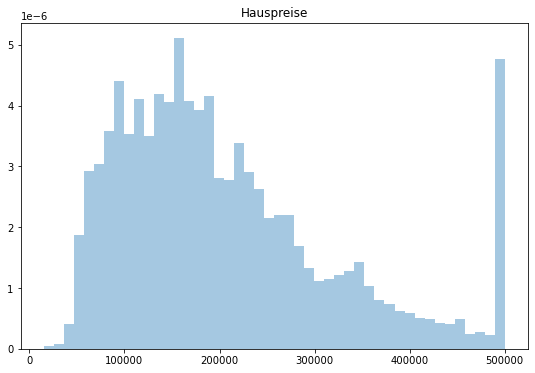

In [9]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Hauspreise')
sns.distplot(df['median_house_value'])
plt.xlabel('Hauspreis')
plt.ylabel('Dichte')

plt.subplot(1,2,2)
plt.title('Boxplot Hauspreise')
sns.boxplot(y=df['median_house_value'])

plt.show()

In [ ]:
category = df['ocean_proximity'].unique()
print("Kategorien in Experience Level: ", category)

Kategorien in Experience Level:  ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


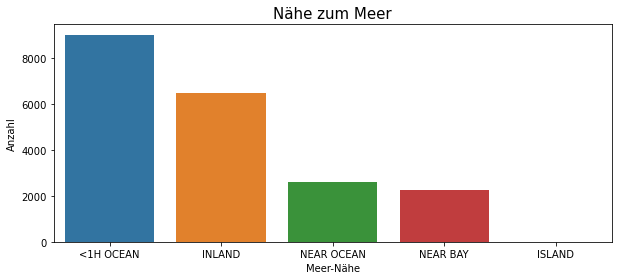

In [ ]:
# Balkendiagramm mit seaborn countplot
plt.figure(figsize=(10,4))
sns.countplot(data = df, x = 'ocean_proximity', order = df['ocean_proximity'].value_counts().index)
plt.title("Nähe zum Meer",fontsize=15)
plt.xlabel("Meer-Nähe",fontsize=10)
plt.ylabel("Anzahl",fontsize=10)
plt.show()

## Kategorisieren der Daten

* Einsortierung der Hauspreise in Kategorien nach Quartilen
* Ziel: Trainings- und Testdaten erhalten gleiche (oder zumindest möglichst ähnliche) Verteilung der Zielvariable median_house_value

In [ ]:
bins = [0] + list(description["median_house_value"][
    ["25%", "50%", "75%"]
].astype(int)) + [np.inf]
print(bins) 
# 0 bis 119.500 = 0 - 25% Quartil, 119.500 bis 179.700 = 25 - 50% Quartil, ...

[0, 119500, 179700, 264700, inf]


In [ ]:
df["house_cat"] = pd.cut(
    df["median_house_value"],
    bins=bins, labels=["0 - 25%", "25 - 50%", "50 - 75%", "75 - 100%"])

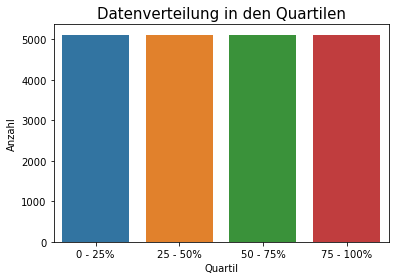

In [ ]:
sns.countplot(data=df, x="house_cat")
plt.title("Datenverteilung in den Quartilen",fontsize=15)
plt.xlabel("Quartil",fontsize=10)
plt.ylabel("Anzahl",fontsize=10)
plt.show()

## Splitten in Trainings- und Testdatensatz

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=6)
for train_index, test_index in split.split(df, df["house_cat"]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]

<Axes: xlabel='house_cat', ylabel='count'>

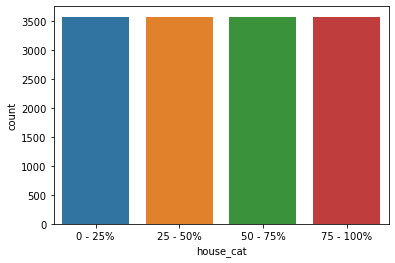

In [ ]:
# Verteilung im Trainingsdatensatz
sns.countplot(data=df_train, x="house_cat")

<Axes: xlabel='house_cat', ylabel='count'>

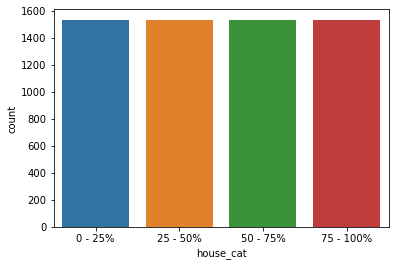

In [ ]:
# Verteilung im Testdatensatz
sns.countplot(data=df_test, x="house_cat")

In [ ]:
# Löschen der Hilfsvariable 'house_cat' aus den gesplitteten Datensätzen
df_train = df_train.drop("house_cat", axis=1)
df_test = df_test.drop("house_cat", axis=1)

# Löschen der Hasupreise > 500k
#df_train = df_train[(df_train['median_house_value'] <=499999)]
#df_test = df_test[(df_test['median_house_value'] <=499999)]

## Darstellung der Daten in einer Karte - auch das geht mit Python!

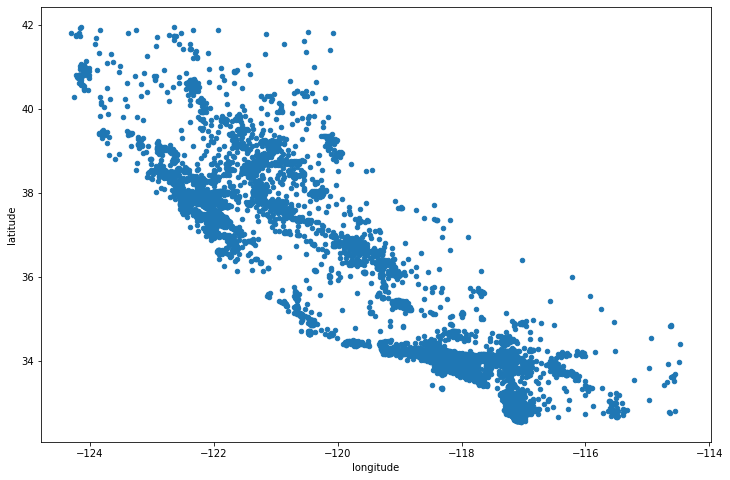

In [ ]:
# Simpler Scatterplot zur Verteilung - wo haben wir Daten
df_train.plot(kind="scatter", x="longitude", y="latitude", figsize=(12, 8));

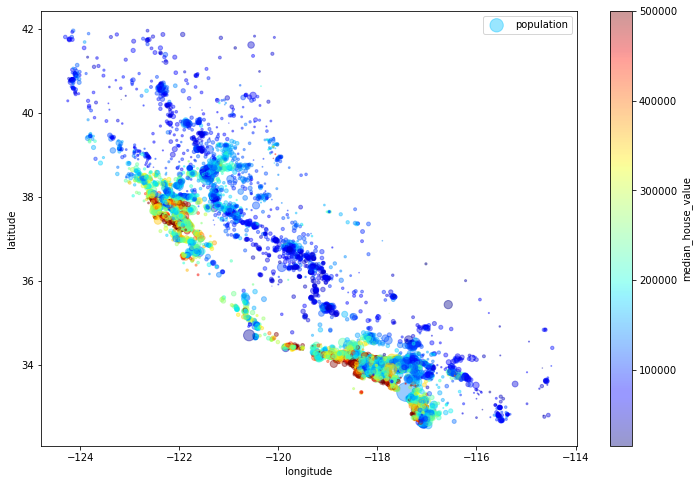

In [ ]:
# Schon etwas mehr Info - wir nehmen die Hauspreise zur Farbcodierung
df_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
    s=df_train["population"]/100, label="population", figsize=(12, 8), c="median_house_value", 
    cmap=plt.get_cmap("jet"), colorbar=True, sharex=False
)
plt.legend();

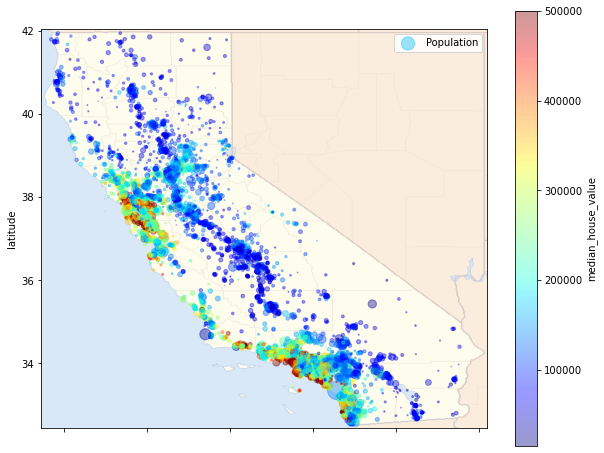

In [ ]:
# Funktion für Darstellung auf einer Karte
def plot_df_on_california(df, california_path):

    ax = df.plot(
        kind="scatter", 
        x="longitude", 
        y="latitude", 
        figsize=(10, 8),
        s=df['population']/100, 
        label="Population",
        c="median_house_value", 
        cmap=plt.get_cmap("jet"),
        colorbar=True, 
        alpha=0.4
    )

    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    california_img = mpimg.imread(california_path)
    plt.imshow(
        california_img, 
        extent=[-124.55, -113.8, 32.45, 42.05], 
        alpha=0.4,
        cmap=plt.get_cmap("jet")
    )

    plt.legend();


CALIFORNIA_PATH = "california.png"

plot_df_on_california(df_train, CALIFORNIA_PATH)

Wir sehen ganz deutlich:

* an der Küste sind die Preise höher, im Inland sind die Preise wesentlich geringer
* teure Wohngebiete treten selten alleine auf, sondern gruppieren sich


In [ ]:
median_house_values_by_proximity = df_train.groupby("ocean_proximity")["median_house_value"].median()
median_house_values_by_proximity

ocean_proximity
<1H OCEAN     215600.0
INLAND        108950.0
ISLAND        414700.0
NEAR BAY      233100.0
NEAR OCEAN    226250.0
Name: median_house_value, dtype: float64

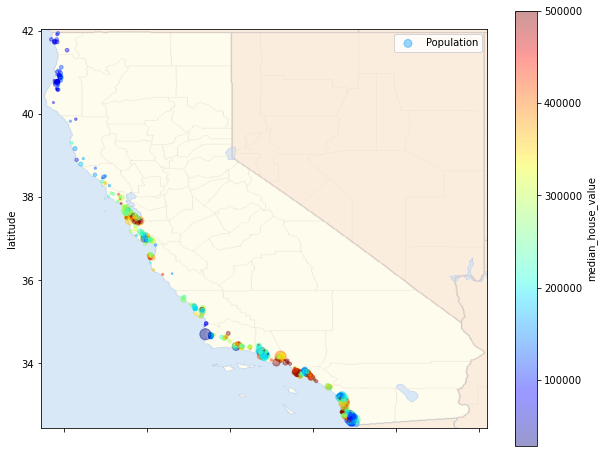

In [ ]:
# Ansicht der Lage je nach Kategorie - Meernähe

def filter_df_by_proximity(df, proximity):
    return df.loc[df["ocean_proximity"] == proximity]

plot_df_on_california(filter_df_by_proximity(df_train, "NEAR OCEAN"), CALIFORNIA_PATH)

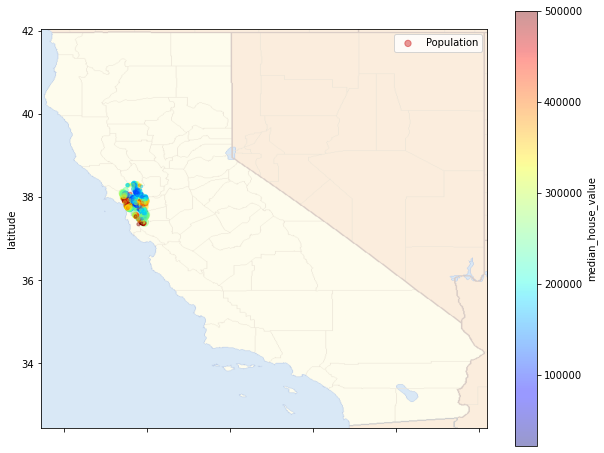

In [ ]:
# Gegend um San Francisco
plot_df_on_california(filter_df_by_proximity(df_train, "NEAR BAY"), CALIFORNIA_PATH)

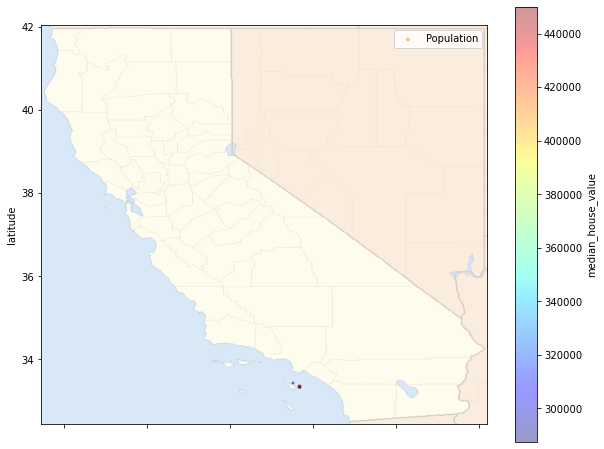

In [ ]:
# Island
plot_df_on_california(filter_df_by_proximity(df_train, "ISLAND"), CALIFORNIA_PATH)

Für Island gibt es zuwenig Werte, als das wir das als Kategorie tatsächlich betrachten sollten. Wir löschen es aus dem Datensatz.

In [ ]:
df_train = df_train.drop(filter_df_by_proximity(df_train, "ISLAND").index)
df_test = df_test.drop(filter_df_by_proximity(df_test, "ISLAND").index)

## Übersicht über Zusammenhänge in den Daten (grafisch)

## Zusammenfassung von Variablen zu einer neuen Variable (weil Abhängigkeiten bestehen) 

a) Empfehlung Zusammenfassung Verhältnis total bedrooms/total rooms

b) Empfehlung Zusammenfassung Verhältnis population/households

--> sowohl für train als auch für test data!

## Starten der ML-Analyse - Lineare Regression

1) Dummy variables einführen bei Regressionsverfahren! (pd.get_dummies(df))
2) MinMaxScaler anwenden, da große Unterschiede in den Größenordnungen
3) X und y (Zielvariable) festlegen
4) RFE zu Beginn
5) VIF checken
6) Modell Accuracy?
7) Anwenden auf die Testdaten
8) Fehler MAE, R2 score?
9) Bewerten / Zusammenfassung / Probleme